In [1]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('data/weight-height.csv')

In [3]:
X=df[['Height']].values
y_true=df[['Weight']].values

In [4]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [5]:
X.shape

(10000, 1)

In [6]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [9]:
model.fit(X,y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 3s 1ms/step - loss: 1025.7984
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 548.7174
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 500.9247
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 435.7102
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 396.7687
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 379.7914
Epoch 7/40
313/313 [==============================] - 0s 894us/step - loss: 338.8208
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 318.4995
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 280.1934
Epoch 10/40
313/313 [==============================] - 0s 910us/step - loss: 267.4122
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 250.2715
Epoch 12/40
313/313 [==============================] - 0s 1ms/step - loss: 227.7

In [10]:
y_pred=model.predict(X)

In [11]:
y_pred

array([[214.2236  ],
       [175.6174  ],
       [216.22885 ],
       ...,
       [138.1636  ],
       [177.54068 ],
       [123.500824]], dtype=float32)

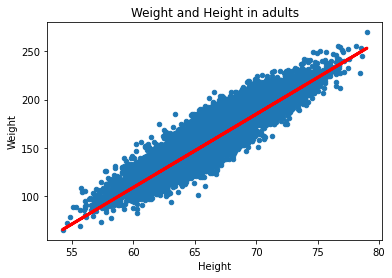

In [12]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='red', linewidth=3)

In [13]:
w,b=model.get_weights()

In [14]:
w

array([[7.6219854]], dtype=float32)

In [15]:
b

array([-348.6373], dtype=float32)

In [16]:
len(X)

10000

In [17]:
model.save('m.h5')

In [18]:
model.predict([[200]])

array([[1175.7598]], dtype=float32)

In [19]:
model.predict([[100]])

array([[413.56125]], dtype=float32)